<a href="https://colab.research.google.com/github/Harshpatel44/Binary-Space-Partition-/blob/master/Version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a) Creating data set

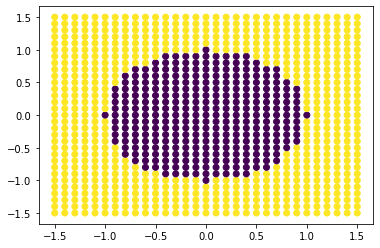

In [254]:
def data_creation(x0,y0,points,p):
    values = np.linspace(x0,y0,points)  # spacing is 0.1, hence 31
    X1, X2 = np.meshgrid(values,values)
    X = np.array([X1.flatten(), X2.flatten()]).T
    y = np.zeros((X.shape[0]), dtype='int32')

    # generating classes
    for i in range(0, X.shape[0]):
        if (np.linalg.norm([X[i][0], X[i][1]], p) <= 1):
            y[i] = 1
        else:
            y[i] = 2
    #plotting
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()
    return X,y
X,y=data_creation(-1.5,1.5,31,2)

b) KNN algorithm

In [0]:
class KNN:
    def __init__(self, k, num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = None

    def train(self, training_data, training_labels):

        self.X=np.array(training_data,dtype='float32')
        self.y= training_labels
        self.parameters = None
        pass

    def get_k(self):
      return self.k

    def set_k(self,k):
      self.k=k

    def predict(self, data):
        
        data=np.array(data)
        predic_list = []
        eucli = np.array((self.X), dtype="float32")
        eucli = np.append(eucli, self.y.reshape(self.y.shape[0], 1), axis=1)
        for k in np.array(data,dtype='float32'):
            e = np.linalg.norm(eucli[:, :-1] - k, 2, axis=1)
            e = e.reshape(e.shape[0], 1)
            eucli_ = np.append(eucli, e, axis=1)
            eucli_ = eucli_[eucli_[:, -1].argsort()][:self.k]
            unique, counts = np.unique(eucli_[:, -2], return_counts=True)
            count_dict = dict(zip(unique, counts))
            predic_list.append(int(max(count_dict, key=count_dict.get)))  
        return predic_list
    
    def accuracy(self, data, labels):
        """
        Returns the proportion of correct classifications computed over data.
        """
        predic_list=self.predict(data)
        count=0
        for i,j in zip(predic_list,labels):
            if(i==j):
                count+=1
        return count/len(labels)

    


Running the model

In [256]:
myClassifier = KNN(k=1, num_classes=2)
some_train_data = X
some_train_labels = y
myClassifier.train(some_train_data, some_train_labels)
predictions = myClassifier.predict([(0,0),(0,1)])
print(predictions)  #  1 = blue, 0 = yellow
acc= myClassifier.accuracy(X,y)
print(acc)

[1, 1]
1.0


C) Visualizing the model

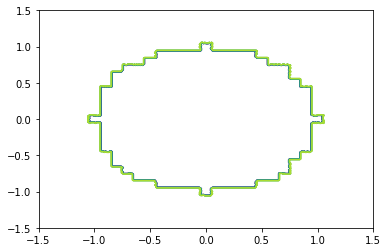

Above plot for K= 1


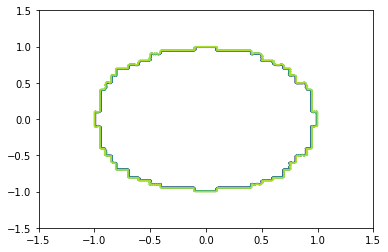

Above plot for K= 3


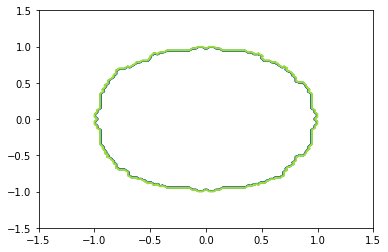

Above plot for K= 5


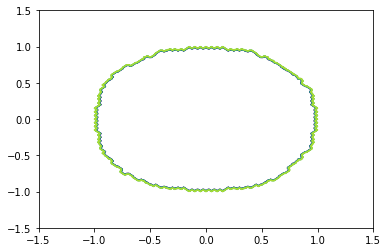

Above plot for K= 10


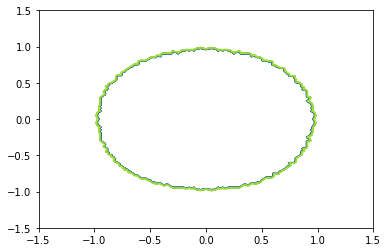

Above plot for K= 50


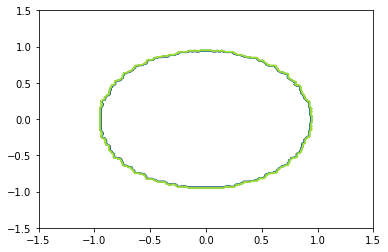

Above plot for K= 100


In [259]:
l=[1,3,5,10,50,100]

def plot_for_k(k_values):
      values = np.linspace(-1.5,1.5,301)
      X1, X2 = np.meshgrid(values,values)
      array=np.empty((301,301))
    
      for k in k_values:
        new_X=0
        new_Y=0
        myClassifier.set_k(k)
        for i in values:
          for j in values:
            array[new_X,new_Y]=myClassifier.predict([(i,j)])[0]
            new_Y+=1
          new_Y=0
          new_X+=1
        plt.contour(X1,X2,array)
        plt.show()
        print("Above plot for K=",myClassifier.get_k())

plot_for_k(l)

`After plotting for different values of K (1,3,5,10,50,100) we can conclude that, the curve becomes more smoother as we increase K value and the model becomes more generalized.`

d) Try another data set

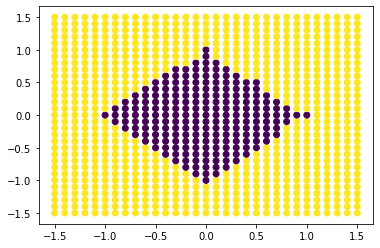

In [260]:
X,y=data_creation(-1.5,1.5,31,1)

Visualizing above generated dataset with different values of K

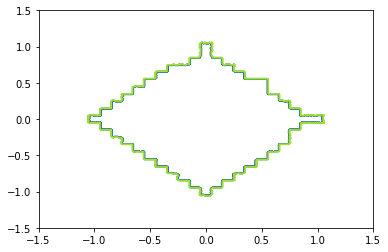

Above plot for K= 1


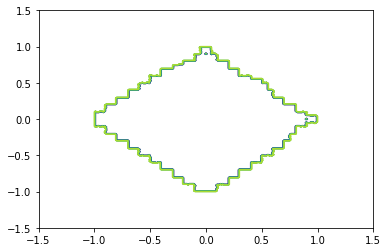

Above plot for K= 3


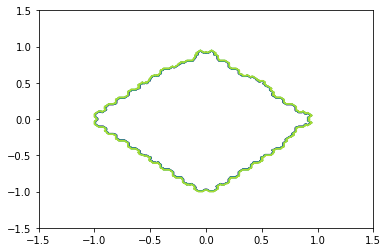

Above plot for K= 5


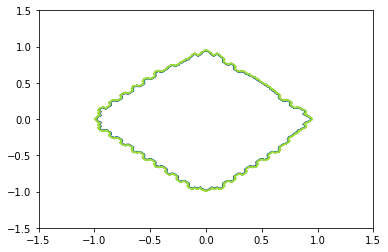

Above plot for K= 10


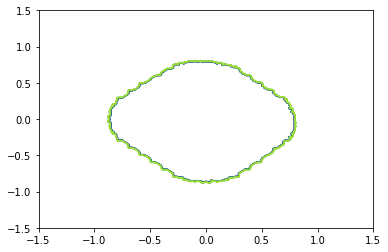

Above plot for K= 50


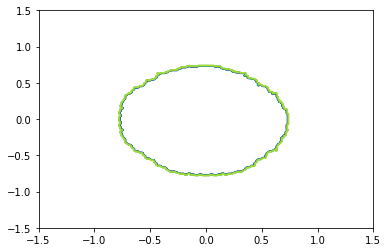

Above plot for K= 100


In [261]:
#creating object of class for above training data
myClassifier = KNN(k=1, num_classes=2)
some_train_data = X
some_train_labels = y
myClassifier.train(some_train_data, some_train_labels)

#plotting for different K
l=[1,3,5,10,50,100]
plot_for_k(l)

`when plotting for small K, values are very discrete and the curve is not smooth. It looks like overfitting. when its increased too high, it becomes very much generalized leading to underfitting. Hence, finding K, which doesnt lead to overfitting or underfitting should provide the best solution.`

**Q2 MNIST DATA**

`below code is for fetching MNIST data from drive. this is just for my usage.`

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


downloaded = drive.CreateFile({'id':'1PzGPanqXSdwsXebqaKbO7uaNQidNjsOK'}) 
downloaded.GetContentFile('mnist_train.csv')  

downloaded2 = drive.CreateFile({'id':'1i4ezuhBEc_VBEWnJ9WS7wQLGP-n-wYOL'}) 
downloaded2.GetContentFile('mnist_test.csv')

`Below code creates the KNN object for MNIST and runs the algorithm.`

In [0]:
import csv
import numpy as np
import time

#shuffling the data
def random(val):
  return np.random.shuffle(val)

f1 = open ('mnist_train.csv','r')
l1=list(csv.reader(f1,delimiter=','))
X=np.array(l1,dtype="int16")
X=random(X)
y = X[:,0]

f2 = open ('mnist_test.csv','r')
l2=list(csv.reader(f2,delimiter=','))
val_X=np.array(l2,dtype="int16")
val_X=random(val_X)
val_y = val_X[:,0]

c_time=time.time()
KNN_classifier=KNN(k=1,num_classes=10)
KNN_classifier.train(X[0:60000,1:],y[0:60000])
#predictions=KNN_classifier.predict(X[11:20,1:])
#print(predictions)
#acc=KNN_classifier.accuracy(X[100:120,1:],y[100:120])

In [308]:
data=val_X[0:6000,1:]
labels=val_y[0:6000]
k_val=[]
accuracy=[]
def plot_k_mnist(l,data,labels):
  for i in l:
    KNN_classifier.set_k(i)
    acc=KNN_classifier.accuracy(data,labels)
    accuracy.append(acc)
    k_val.append(KNN_classifier.get_k())
    print(acc,KNN_classifier.get_k())
plot_k_mnist(l,data,labels)

0.9596666666666667 1
0.961 3
0.9586666666666667 5
0.956 10
0.9396666666666667 50
0.9261666666666667 100


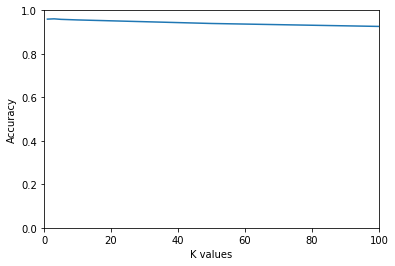

In [309]:
plt.axis([0,100,0,1])
plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.plot(k_val,accuracy)
plt.show()